In [136]:
# change to directory based on your OS or set it to your trained model
tts_path = "C:\\Users\\User\\AppData\\Local\\tts\\tts_models--en--vctk--vits\\model_file.pth"
tts_config_path = "C:\\Users\\User\\AppData\\Local\\tts\\tts_models--en--vctk--vits\\config.json"
speakers_file_path = "C:\\Users\\User\\AppData\\Local\\tts\\tts_models--en--vctk--vits\\speakers.json"

In [137]:
from TTS.utils.synthesizer import Synthesizer
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [138]:
synthesizer = Synthesizer(
    tts_checkpoint=tts_path,
    tts_config_path=tts_config_path,
    tts_speakers_file=speakers_file_path,
    use_cuda=True,
)

 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > initialization of speaker-embedding layers.


In [139]:
synthesizer.tts_model.speaker_manager.speaker_names

['ED\n',
 'p225',
 'p226',
 'p227',
 'p228',
 'p229',
 'p230',
 'p231',
 'p232',
 'p233',
 'p234',
 'p236',
 'p237',
 'p238',
 'p239',
 'p240',
 'p241',
 'p243',
 'p244',
 'p245',
 'p246',
 'p247',
 'p248',
 'p249',
 'p250',
 'p251',
 'p252',
 'p253',
 'p254',
 'p255',
 'p256',
 'p257',
 'p258',
 'p259',
 'p260',
 'p261',
 'p262',
 'p263',
 'p264',
 'p265',
 'p266',
 'p267',
 'p268',
 'p269',
 'p270',
 'p271',
 'p272',
 'p273',
 'p274',
 'p275',
 'p276',
 'p277',
 'p278',
 'p279',
 'p280',
 'p281',
 'p282',
 'p283',
 'p284',
 'p285',
 'p286',
 'p287',
 'p288',
 'p292',
 'p293',
 'p294',
 'p295',
 'p297',
 'p298',
 'p299',
 'p300',
 'p301',
 'p302',
 'p303',
 'p304',
 'p305',
 'p306',
 'p307',
 'p308',
 'p310',
 'p311',
 'p312',
 'p313',
 'p314',
 'p316',
 'p317',
 'p318',
 'p323',
 'p326',
 'p329',
 'p330',
 'p333',
 'p334',
 'p335',
 'p336',
 'p339',
 'p340',
 'p341',
 'p343',
 'p345',
 'p347',
 'p351',
 'p360',
 'p361',
 'p362',
 'p363',
 'p364',
 'p374',
 'p376']

In [140]:
raw_text = "hello world."

In [141]:
output = synthesizer.tts(text=raw_text, speaker_name="p225", return_extra_outputs=True)
Audio(output[0], rate=22050)

 > Text splitted to sentences.
['hello world.']
 > Processing time: 0.18950819969177246
 > Real-time factor: 0.1235996155703852


In [142]:
output[1]["outputs"]["durations"].size(), output[1]["outputs"]["durations"].sum()

(torch.Size([1, 1, 29]), tensor(93., device='cuda:0'))

In [143]:
tokens = synthesizer.tts_model.tokenizer.text_to_ids(raw_text)
len(tokens)

29

In [144]:
len([synthesizer.tts_model.tokenizer.decode([y]) for y in tokens])

29

In [145]:
pre_tokenized_text = [synthesizer.tts_model.tokenizer.decode([y]) for y in tokens]
# replace <blnk> with space
pre_tokenized_text = [x if x != "<BLNK>" else "_" for x in pre_tokenized_text]

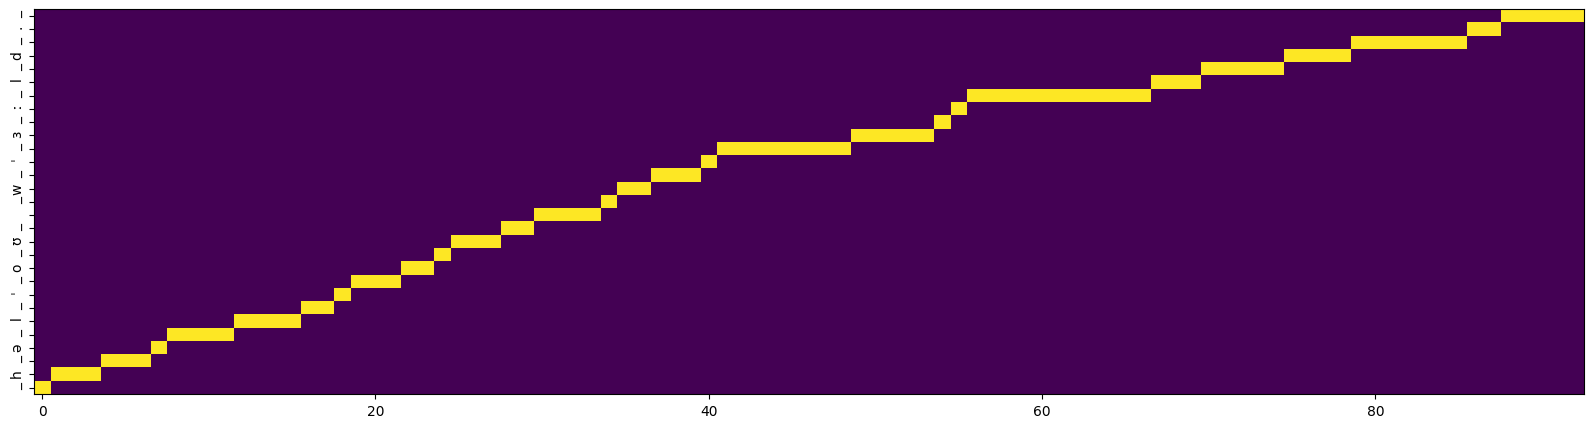

In [146]:
plt.figure(figsize=(20, 5))
# plot alighnment
plt.imshow(output[1]["outputs"]["alignments"][0].cpu().numpy(), origin="lower", aspect="auto", interpolation="none")
# plt imshow x tick labels
plt.yticks(range(len(pre_tokenized_text)), pre_tokenized_text, rotation=90)
plt.show()

In [147]:
output[1]["outputs"]["durations"].sum()

tensor(93., device='cuda:0')

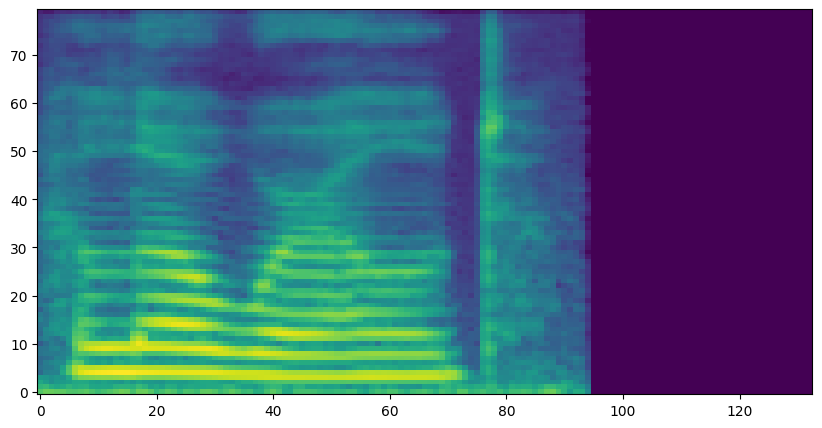

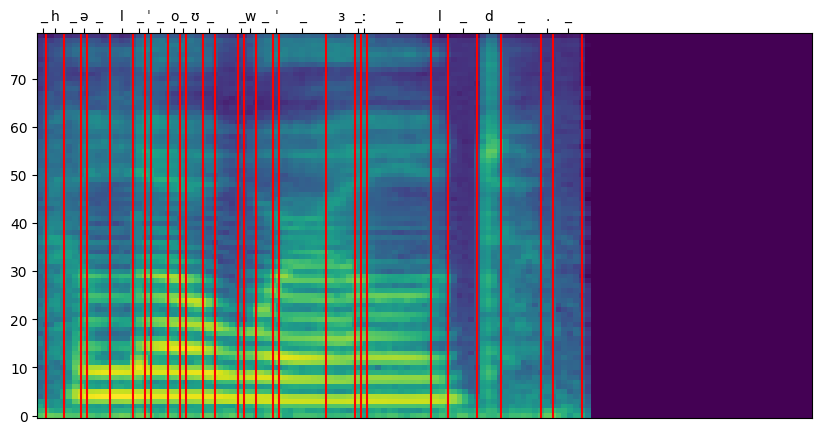

In [148]:
# plot the spectrogram
spec = synthesizer.tts_model.ap.melspectrogram(np.array(output[0]))
plt.figure(figsize=(10, 5))
plt.imshow(spec, origin="lower", aspect="auto", interpolation="none")
# create xticks with pre_tokenized_text
plt.show()

# plot the spectrogram with xticks
spec = synthesizer.tts_model.ap.melspectrogram(np.array(output[0]))
plt.figure(figsize=(10, 5))
plt.imshow(spec, origin="lower", aspect="auto", interpolation="none")
# create labels at the xticks
# plt.xticks(np.cumsum(output[1]["outputs"]["durations"].cpu().numpy()), pre_tokenized_text, rotation=0)
# shift the xticks to the middle of the bins
plt.xticks(
    np.cumsum(output[1]["outputs"]["durations"].cpu().numpy()[0][0])
    - output[1]["outputs"]["durations"].cpu().numpy()[0][0] / 2,
    pre_tokenized_text,
    rotation=0,
)
# draw a vertical line for each token
for x in np.cumsum(output[1]["outputs"]["durations"].cpu().numpy()):
    plt.axvline(x, color="r")
# move xticks to the top
plt.gca().xaxis.tick_top()
plt.show()

In [149]:
output = synthesizer.tts(text=raw_text, speaker_name="p225", return_extra_outputs=True)
Audio(output[0], rate=22050)

 > Text splitted to sentences.
['hello world.']
 > Processing time: 0.38100576400756836
 > Real-time factor: 0.23598812068446298


In [150]:
output[1]["outputs"]["durations"]

tensor([[[ 1.,  2.,  2.,  3.,  2.,  6.,  2.,  1.,  2.,  3.,  1.,  1.,  2.,  4.,
           2.,  2.,  5.,  3.,  6.,  6.,  2.,  3.,  4.,  6.,  4.,  3.,  5.,  6.,
          11.]]], device='cuda:0')

In [151]:
new_durations = output[1]["outputs"]["durations"].clone()

In [152]:
list(zip(range(len(pre_tokenized_text)), pre_tokenized_text, output[1]["outputs"]["durations"].cpu().numpy()[0][0]))

[(0, '_', 1.0),
 (1, 'h', 2.0),
 (2, '_', 2.0),
 (3, 'ə', 3.0),
 (4, '_', 2.0),
 (5, 'l', 6.0),
 (6, '_', 2.0),
 (7, 'ˈ', 1.0),
 (8, '_', 2.0),
 (9, 'o', 3.0),
 (10, '_', 1.0),
 (11, 'ʊ', 1.0),
 (12, '_', 2.0),
 (13, ' ', 4.0),
 (14, '_', 2.0),
 (15, 'w', 2.0),
 (16, '_', 5.0),
 (17, 'ˈ', 3.0),
 (18, '_', 6.0),
 (19, 'ɜ', 6.0),
 (20, '_', 2.0),
 (21, 'ː', 3.0),
 (22, '_', 4.0),
 (23, 'l', 6.0),
 (24, '_', 4.0),
 (25, 'd', 3.0),
 (26, '_', 5.0),
 (27, '.', 6.0),
 (28, '_', 11.0)]

In [153]:
new_durations[0][0][15:22] *= 3

In [154]:
new_durations

tensor([[[ 1.,  2.,  2.,  3.,  2.,  6.,  2.,  1.,  2.,  3.,  1.,  1.,  2.,  4.,
           2.,  6., 15.,  9., 18., 18.,  6.,  9.,  4.,  6.,  4.,  3.,  5.,  6.,
          11.]]], device='cuda:0')

In [155]:
# tts the text
output = synthesizer.tts(text=raw_text, speaker_name="p225", return_extra_outputs=True, durations=new_durations[0])
Audio(output[0], rate=22050)

 > Text splitted to sentences.
['hello world.']
 > Processing time: 0.2519981861114502
 > Real-time factor: 0.11242635164611275


In [156]:
output[1]["outputs"]["durations"]

tensor([[[ 1,  2,  2,  3,  2,  6,  2,  1,  2,  3,  1,  1,  2,  4,  2,  6, 15,
           9, 18, 18,  6,  9,  4,  6,  4,  3,  5,  6, 11]]], device='cuda:0')